In [1]:
import sys
sys.path.append("../")
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from Linearity import Neuron
from IPython.display import set_matplotlib_formats
import scipy.stats as ss
from pickle import dump as dump
plt.style.use('neuron')

In [2]:
def simpleaxis(axes, every=False, outward=False):
    if not isinstance(axes, (list, np.ndarray)):
        axes = [axes]
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if (outward):
            ax.spines['bottom'].set_position(('outward', 10))
            ax.spines['left'].set_position(('outward', 10))
        if every:
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_title('')

## 1 C (CA3 heatmap)

In [23]:
ca3_neuron = Neuron.load('/media/sahil/NCBS_Shares_BGStim/patch_data/160927/c4_CA3_CPP/plots/c4_CA3_CPP.pkl')

In [24]:
AP_dict = np.zeros((12,12))
SubThP_dict = np.zeros((12,12))
for expType, exp in ca3_neuron:
    if expType == "Control":
        for coord in exp[1].coordwise:
            temp_coord = []
            for trial in exp[1].coordwise[coord].trials:
                temp_coord.append(trial.AP_flag)
            AP_dict[list(coord)[0]] = np.sum(temp_coord)
            SubThP_dict[list(coord)[0]] = exp[1].coordwise[coord].average_feature[0]

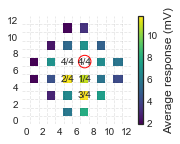

In [27]:
SubThP_dict = np.ma.masked_where(SubThP_dict == 0., SubThP_dict)
SubThP_dict = np.ma.masked_where(np.isnan(SubThP_dict), SubThP_dict)
cmap = plt.cm.viridis
cmap.set_bad(color='white')

fig, ax = plt.subplots()
heatmap = ax.pcolormesh(SubThP_dict, cmap=cmap, vmin=np.nanmin(SubThP_dict), vmax=np.nanmax(SubThP_dict))

# # mark a specific square?
# zeros = np.zeros((12,12))
# AP_coords = np.where(AP_dict>0)
# zeros[AP_coords] = 1.
# c = np.ma.masked_array(zeros, zeros == 0.)  # mask squares where value == 1
# ax.pcolormesh(np.arange(13), np.arange(13), c, alpha=1.0, zorder=2, facecolor='none', edgecolors='k',
#                cmap='gray')

for y in range(AP_dict.shape[0]):
    for x in range(AP_dict.shape[1]):
        if AP_dict[y, x] > 0:
            plt.text(x + 0.5, y + 0.5, "{}/4".format(int(AP_dict[y, x])),
                     horizontalalignment='center',
                     verticalalignment='center', size=10)

circle1 = plt.Circle((7.5, 7.5), 0.75, color='r', fill=False)

ax.invert_yaxis()
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_ticks(np.arange(1,13), minor=True)
    axis.set(ticks=np.arange(0,13,2)+0.5, ticklabels=np.arange(0,13,2)) #Skipping square labels

ax.grid(True, which='minor', axis='both', linestyle='--', alpha=0.1, color='k')
ax.set_xlim((0,13))
ax.set_ylim((0,13))

#Colorbar stuff
cbar = plt.colorbar(heatmap, label="Average response (mV)")
cbar.ax.get_yaxis().labelpad = 6
tick_locator = matplotlib.ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()

ax.add_artist(circle1)
ax.set_aspect(1)
fig.set_figheight(2.)
fig.set_figwidth(2.5)
simpleaxis(ax,every=True,outward=False)
dump(fig,file('figures/fig1/1c.pkl','wb'))
plt.show()

## 1 D (CA3 jitter)

1.93632988824


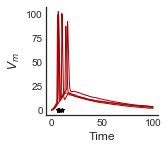

In [28]:
fig, ax = plt.subplots()
AP_dict = np.zeros((12,12))
tsp = []
for expType, exp in ca3_neuron:
    if expType == "Control":
        for trial in exp[1].coordwise[frozenset([(7,7)])].trials:
            time = np.linspace(0,100,len(trial.interestWindow))
            ax.plot(time, trial.interestWindow, color=(170/256., 0, 0))
            tsp.append(time[np.argmax(trial.interestWindow)])
ax.set_xlabel("Time")
ax.set_ylabel("$V_m$")
ax.plot(tsp, [0]*len(tsp), 'k*', markersize=5)
print(np.std(tsp, ddof = 1))
fig.set_figheight(2)
fig.set_figwidth(2)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
simpleaxis(ax)
dump(fig,file('figures/fig1/1d.pkl','wb'))
plt.show()

## 1 E (CA3 jitter distribution)

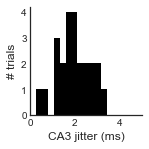

In [29]:
fig, ax = plt.subplots()
AP_dict = np.zeros((12,12))
jitter = []
for expType, exp in ca3_neuron:
    if expType == "Control":
        for coord in exp[1].coordwise:
            tsp = []
            for trial in exp[1].coordwise[coord].trials:
                time = np.linspace(0,100,len(trial.interestWindow))
                tsp.append(time[np.argmax(trial.interestWindow)])
            jitter.append(np.std(tsp, ddof = 1))
ax.set_xlabel("CA3 jitter (ms)")
ax.set_ylabel("# trials")
bins = np.linspace(0,5,20)
ax.hist(jitter, bins=bins)
ax.set_xlim((0,5))
fig.set_figheight(2)
fig.set_figwidth(2)
simpleaxis(ax)
dump(fig,file('figures/fig1/1e.pkl','wb'))
plt.show()

## 1 F (CA1 heatmap)

In [30]:
neuronList = []
ca1_neuron = Neuron.load('/media/sahil/NCBS_Shares_BGStim/patch_data/161013/c1/plots/c1.pkl')

In [31]:
coordwise = ca1_neuron.experiment["Control"][1].coordwise
epsp_dict = np.zeros((12,12))

for coord in coordwise:
    epsp_dict[list(coord)[0]] = coordwise[coord].average_feature[0]

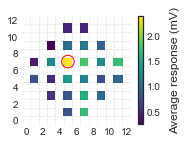

In [32]:
epsp_dict = np.ma.masked_where(epsp_dict == 0., epsp_dict)
cmap = plt.cm.viridis
cmap.set_bad(color='white')

fig, ax = plt.subplots()
heatmap = ax.pcolormesh(epsp_dict, cmap=cmap)
circle1 = plt.Circle((5.5, 7.5), 0.75, color='r', fill=False)

ax.set_title("CA1 cell response")

ax.invert_yaxis()
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_ticks(np.arange(1,13), minor=True)
    axis.set(ticks=np.arange(0,13,2)+0.5, ticklabels=np.arange(0,13,2)) #Skipping square labels

ax.grid(True, which='minor', axis='both', linestyle='--', alpha=0.1, color='k')

ax.set_xlim((0,13))
ax.set_ylim((0,13))

# Colorbar stuff
cbar = plt.colorbar(heatmap, label="Average response (mV)")
cbar.ax.get_yaxis().labelpad = 10
tick_locator = matplotlib.ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()

ax.add_artist(circle1)
ax.set_aspect(1)
simpleaxis(ax, every=True, outward=False)
dump(fig,file('figures/fig1/1f.pkl','wb'))

fig.set_figheight(2.)
fig.set_figwidth(2.5)

plt.show()

## 1 G (CA1 jitter)

3.25367747385


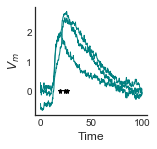

In [11]:
fig, ax = plt.subplots()
tsp = []
for expType, exp in ca1_neuron:
    if expType == "Control":
        for trial in exp[1].coordwise[frozenset([(7,5)])].trials:
            time = np.linspace(0,100,len(trial.interestWindow))
            ax.plot(time, trial.interestWindow, color=(0,.5,.5))
            tsp.append(time[np.argmax(trial.interestWindow)])
ax.set_xlabel("Time")
ax.set_ylabel("$V_m$")
ax.plot(tsp, [0]*len(tsp), 'k*', markersize=5)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
print(np.std(tsp, ddof=1))
fig.set_figheight(2)
fig.set_figwidth(2)
simpleaxis(ax)
dump(fig,file('figures/fig1/1g.pkl','wb'))
plt.show()

## 1 H (CA1 jitter distribution)

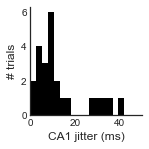

In [12]:
fig, ax = plt.subplots()
ca1_jitter = []
for expType, exp in ca1_neuron:
    if expType == "Control":
        for coord in exp[1].coordwise:
            tsp = []
            for trial in exp[1].coordwise[coord].trials:
                time = np.linspace(0,100,len(trial.interestWindow))
                tsp.append(time[np.argmax(trial.interestWindow)])
            ca1_jitter.append(np.std(tsp, ddof = 1))
ax.set_xlabel("CA1 jitter (ms)")
ax.set_ylabel("# trials")
bins = np.linspace(0,50,20)
ax.hist(ca1_jitter, bins=bins)
ax.set_xlim((0,50))
fig.set_figheight(2)
fig.set_figwidth(2)
simpleaxis(ax)
dump(fig,file('figures/fig1/1h.pkl','wb'))
plt.show()

## 1 I, J (CA1 amplitude variability )

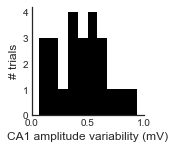

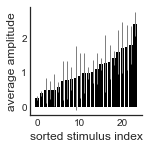

In [13]:
ca1_amp_jitter = []
average_psp = []
for expType, exp in ca1_neuron:
    if expType == "Control":
        for coord in exp[1].coordwise:
            amp = []
            for trial in exp[1].coordwise[coord].trials:
                amp.append(trial.feature[0])
            average_psp.append(exp[1].coordwise[coord].average_feature[0])
            ca1_amp_jitter.append(np.std(amp, ddof = 1))
            
fig, ax = plt.subplots()
ax.set_xlabel("CA1 amplitude variability (mV)")
ax.set_ylabel("# trials")
bins = 10
ax.hist(ca1_amp_jitter, bins=bins)
ax.set_xlim((0,1))
fig.set_figheight(2)
fig.set_figwidth(2)
simpleaxis(ax)
dump(fig,file('figures/fig1/1i.pkl','wb'))
plt.show()

fig, ax = plt.subplots()
average_psp = np.array(average_psp)
indices = np.argsort(average_psp)
ca1_amp_jitter = np.array(ca1_amp_jitter)
ax.bar(np.arange(len(average_psp)), average_psp[indices], yerr = ca1_amp_jitter[indices], ecolor='0.5')
ax.set_xlabel("sorted stimulus index")
ax.set_ylabel("average amplitude")
fig.set_figheight(2)
fig.set_figwidth(2)
simpleaxis(ax)
dump(fig,file('figures/fig1/1j.pkl','wb'))
plt.show()

Population statistics

In [14]:
neuronList = []
with open("/media/sahil/NCBS_Shares_BGStim/patch_data/current_clamp_files.txt", 'r') as fp:
    fileList = fp.read().splitlines()
    for i,filename in enumerate(fileList):
        fileList[i] += "plots/" + filename.split('/')[-2] + ".pkl"
        try:
            print ("Reading ", fileList[i])
            neuronList.append(Neuron.load(fileList[i]))
        except:
            print ("Couldn't read", fileList[i])
print ("Read {} files.".format(len(fileList)))

Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150828/c2/plots/c2.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150902/c1/plots/c1.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150902/c2/plots/c2.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150904/c1/plots/c1.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150904/c3/plots/c3.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160126/c3/plots/c3.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160209/c4/plots/c4.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160219/c5/plots/c5.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160223/c2/plots/c2.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160223/c3/plots/c3.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160513/c5/plots/c5.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160617/c5/plots/c5.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160817/c2/plots/c2.pkl
Reading  /media/sahil/NCB

## 1 K (distribution of EPSP one squares)

In [20]:
def figureK(feature = 0):
    ''' Get's the fraction of times an AP occurs verus PSPs '''
    epsp_1sq = []
    squares = 1
    feature = 0
    numBins = 200
    for neuron in neuronList:
        try:
            trials = neuron.experiment["Control"][squares].trial
            for trialNum in trials:
                trial = neuron.experiment["Control"][squares].trial[trialNum]
                epsp_1sq.append(trial.feature[feature])
        except:
            print("{}, {}: No control dataset!".format(neuron.index, neuron.date))
    #print (np.mean(epsp_1sq), np.median(epsp_1sq), ss.mode(epsp_1sq))
    print(len(epsp_1sq))
    print(ss.kstest(epsp_1sq, "lognorm", ss.lognorm.fit(epsp_1sq)))
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(epsp_1sq, bins=numBins)
    maxBin = np.argmax(n)
    modeEPSP = bins[maxBin]
    ymin, ymax = ax.get_ylim()
    ax.vlines(modeEPSP,ymin,ymax, linestyles='--', color='0.5')
    ax.annotate("{:.2f} mV".format(modeEPSP), xy=(modeEPSP, ymax), xytext=(1.2*modeEPSP, ymax), textcoords='data')
    ax.set_xlabel("PSP Amplitude (mV)")
    ax.set_ylabel("# recorded PSPs")
    fig.set_figheight(2)
    fig.set_figwidth(2)
    simpleaxis(ax, outward=False)
    dump(fig,file('figures/fig1/1k.pkl','wb'))
    plt.show()

5_c4_160122, RS_TBS_short: No control dataset!
9702
KstestResult(statistic=0.11391330504164798, pvalue=8.9042240340983708e-110)


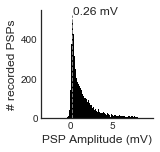

In [21]:
figureK()

## 1 L (Fraction of APs and sublinear responses)

In [25]:
def figureL(feature = 0):
    ''' Get's the fraction of times an AP occurs verus PSPs '''
    numNeurons = 0
    numAP = 0
    numPSP = 0
    for neuron in neuronList:
        for experiment in neuron.experiment:
            if experiment == "Control":    
                numNeurons+=1
                for squares in neuron.experiment[experiment]:
                    nSq = neuron.experiment[experiment][squares].trial
                    for trialnum in nSq:
                        if nSq[trialnum].AP_flag:
                            numAP+=1
                        else:
                            numPSP+=1
    
    fracAPs = float(numAP)/numPSP
    fig, ax = plt.subplots()
    index = np.arange(2)
    width = 0.5
    ax.bar(index, (numPSP, numAP), width)
    ax.set_title("CA1 responses")
    ax.set_ylabel("Frequency")
    ax.set_xticks(index)
    ax.set_xticklabels(('PSP', 'AP'))
    #ax.set_yticks(list(ax.get_yticks()) + [numAP])
    ax.annotate("{:.2f} %".format(fracAPs*1e2), xy=(0.8, numAP*2.0), xytext=(0.75, numAP*5), textcoords='data')
    xaxisVal = ax.get_xlim()[0]
    ax.hlines(numAP, xaxisVal, index[1],linestyle="--")
    fig.set_figheight(2)
    fig.set_figwidth(2)
    ax.set_ylim(0,22500)
#     ax.set_yscale('log')
    simpleaxis(ax, outward=False)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.yaxis.major.formatter._useMathText = True
    dump(fig,file('figures/fig1/1l.pkl','wb'))
    plt.show()
    print ("Legend text: Number of cells: {}, number of points: {}, fraction of APS: {}".format(numNeurons, numAP+numPSP, fracAPs))

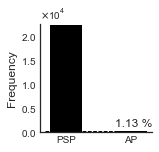

Legend text: Number of cells: 49, number of points: 22371, fraction of APS: 0.0113014782334


In [26]:
figureL()

## 1 M (Desensitization of CA3)

In [27]:
ca3_cell = '/media/sahil/NCBS_Shares_BGStim/patch_data/161013/c2_CA3_CPP/CPP/desensitization_161013_c2.txt'

In [28]:
desenCell = np.loadtxt(ca3_cell, delimiter=',')

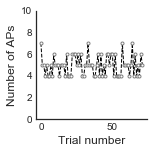

In [29]:
fig, ax = plt.subplots()
ax.plot(desenCell, 'o--', markersize=3, mfc='1', markeredgecolor='0.5')
# ax.bar(range(len(desenCell)), desenCell)
ax.set_ylim(0,10)
ax.set_xlabel("Trial number")
ax.set_ylabel("Number of APs")
simpleaxis(ax)
fig.set_figheight(2)
fig.set_figwidth(2)
dump(fig,file('figures/fig1/1m.pkl','wb'))
plt.show()